<b>Spotify Popularity Predictions Based on Audio Features</b>

<b>Basic Flow</b>
- Background and Related Works
- Objective
- Machine Learning Technniques
- Description of the Data
- Data Preprocessing
- Feature Selection
- Metrics
- Model Training
- Summary and Analysis

<b>Background and Related Works</b>

In recent years, music revenue in the United States has seen substantial growth. In 2017, revenues from recorded music in the United States increased 16.5% at estimated retail value to $8.7 billion, continuing the growth from the previous year. Paid subscriptions from streaming services like Spotify and Apple Music were the biggest growth driver for the music industry in 2017. The revenues from streaming platforms made up 65% of total industry revenues. [1] Online streaming can now be seen as 
the new norm for accessing and distributing music. Therefore, having a fundamental understanding of what makes a song popular 
has major implications to musicians and record labels that thrive on stream count and song popularity. 

The ability to make accurate predictions of song popularity could be achieved through the use of machine learning techniques. 

Pham, Kyauk and Park used both acoustic features and metadata to create both classification and predictive models, to determine 
if whether or not the song is popular or in the case of the latter, predict the popularity score. Upon applying SVMs, neural 
networks and logistic regression for classification, SVM (Gaussian kernel) yielded the highest F1 score. As for regression, 
they fitted the models using a standard multiple linear regression, and applied feature selection methods to achieve the best 
coefficient estimates for regression.it was Logistic Lasso regression that yielded the smallest test error. The research 
concluded that the acoustic features aren’t nearly as predicative as the metadata features. A likely reason for this is that 
there is a lot of variation in acoustic features within a single song that make it difficult to extract metrics that represent 
an entire song.[2]

<b>Objective</b>

Determine the popularity of a song based on the given audio features with a value of 1 for popular and 0 for unpopular.

<b> Machine Learning Techniques</b>

A. Classification:<br>
1. Naive Bayes<br>
2. SVM<br>
3. Decision Tree<br>
4. Logistic Regression<br>
5. KNN<br>
6. Neural Network<br>

Among these models, we chose to implement naive bayes, decision tree, and neural network.

<b>Description of the Data</b>

This research uses data from two Kaggle datasets, namely Spotify’s Worldwide Daily Song Ranking [1] and Top Spotify Tracks of 2017 [2]. The former is a collection of Spotify’s most streamed songs in different regions across the world for each day of 2017. Each row contains a ranking position on a specific day and region. There are roughly 200 entries per day for each region, however be aware that some of Spotify's data was missing in very few occasions. Due to this, the researchers have only focused on the streams (stream count) column for each entry. The latter is a collection of the audio features of the songs found in the Top Spotify Tracks of 2017 playlist in Spotify. Aside from the song title, artist and song url, each song is given values for 13 audio features listed and defined by Spotify API below.
<style>
table, th, td {
    border: 1px solid black;
    border-collapse: collapse;
    padding: 15px;
    text-align: left;
}
</style>
<table>
  <tr>
    <th>Feature</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>Danceability</td>
    <td>Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td> 
  </tr>
  <tr>
    <td>Energy</td>
    <td>A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td> 
  </tr>
  <tr>
    <td>Key</td>
    <td>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td> 
  </tr>
  <tr>
    <td>Loudness</td>
    <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td> 
  </tr>
  <tr>
    <td>Mode</td>
    <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td> 
  </tr>
  <tr>
    <td>Speechiness</td>
    <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td> 
  </tr>
  <tr>
    <td>Acousticness</td>
    <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td> 
  </tr>
  <tr>
    <td>Instrumentalness</td>
    <td>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td> 
  </tr>
  <tr>
    <td>Liveliness</td>
    <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td> 
  </tr>
  <tr>
    <td>Valence</td>
    <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td> 
  </tr>
  <tr>
    <td>Tempo</td>
    <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td> 
  </tr>
  <tr>
    <td>Duration</td>
    <td>The duration of the track in milliseconds.</td> 
  </tr>
  <tr>
    <td>Time Signature</td>
    <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
  </tr>
</table>

Shown below is the hard-coded table (since file size is extremely large) of the first 5 rows of the Spotify’s Worldwide Daily Song Ranking dataset. For reference, you can view the entire dataset here: https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking/data

<table>
  <tr>
    <th>Position</th>
    <th>Track Name</th>
    <th>Artist</th>
    <th>Streams</th> 
    <th>URL</th>
    <th>Date</th>
    <th>Region</th> 
  </tr>
  <tr>
    <td>1</td>
    <td>Reggaetón Lento (Bailemos)</td>
    <td>CNCO</td>
    <td>19272</td> 
    <td>https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo</td>
    <td>2017-01-01</td>
    <td>ec</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Chantaje</td>
    <td>Shakira</td>
    <td>19270</td> 
    <td>https://open.spotify.com/track/6mICuAdrwEjh6Y6lroV2Kg</td>
    <td>2017-01-01</td>
    <td>ec</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Otra Vez (feat. J Balvin)</td>
    <td>Zion & Lennox</td>
    <td>15761</td> 
    <td>https://open.spotify.com/track/3QwBODjSEzelZyVjxPOHdq</td>
    <td>2017-01-01</td>
    <td>ec</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Vente Pa' Ca</td>
    <td>Ricky Martin</td>
    <td>14954</td> 
    <td>https://open.spotify.com/track/7DM4BPaS7uofFul3ywMe46</td>
    <td>2017-01-01</td>
    <td>ec</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Safari</td>
    <td>J Balvin</td>
    <td>14269</td> 
    <td>https://open.spotify.com/track/6rQSrBHf7HlZjtcMZ4S4bO</td>
    <td>2017-01-01</td>
    <td>ec</td>
  </tr>
</table>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Shown below is the first 5 rows of the Top Spotify Tracks of 2017 dataset.

In [2]:
spotify = pd.read_csv('featuresdf.csv')
spotify.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


<b>Feature Correlation Heatmap</b><br>

Here we identify the positively/negatively correlated  features.

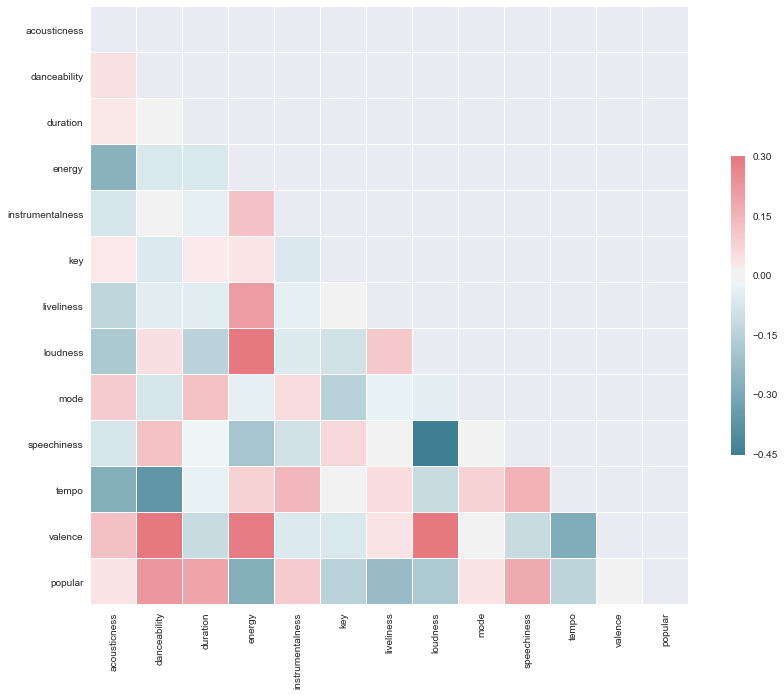

In [3]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

data = pd.read_csv('spotify_dataset.csv')

# Compute the correlation matrix
corr = data.corr()
print()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<b> Distribution plots of Popular vs Not Popular </b>

We can easily view the differences of the values betweeen the popular and the not popular entries. 
Feel free to change the column name to see the bi-variate plot for each feature.

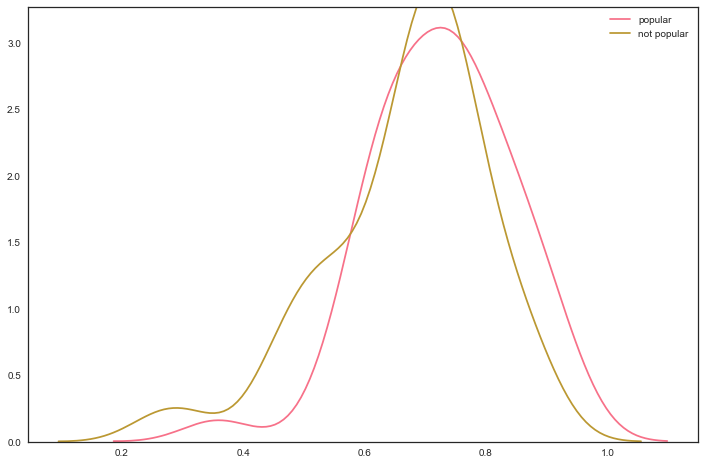

In [4]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

data = pd.read_csv('spotify_dataset.csv')

popular = data.query('popular == 1')
notpop = data.query('popular == 0')
#print(subset)

sns.set_palette("husl")

popular = sns.kdeplot(popular['danceability'], label='popular') #pink
notpop = sns.kdeplot(notpop['danceability'], label='not popular') #yellow

plt.legend()
plt.show()

<b>Data Preprocessing</b>

Since the research checks the association between the song’s stream count and the song’s features, the researchers have to make sure that the song entry exists in both datasets. The researchers mapped the 100 songs from the Top Spotify Tracks dataset to the entries in the Spotify’s Worldwide Daily Song Ranking dataset and pulled entries with matching song titles. The 256718 entries will serve as the researchers’ working dataset. The dataset would contain duplicate entries, since songs could be on the top 200 in a span of several days in different regions. The researchers get the total stream count per song for the whole year.<br><br>
With stream count as the metric of popularity, songs with a stream count higher than mean would be considered as popular (1) and the rest would be labeled as unpopular (0). The song name, stream count and other columns are no longer relevant after preprocessing thus they are removed.

Shown below is the final product of the data preprocessing.

In [5]:
spotify = pd.read_csv('spotify_dataset.csv')
spotify.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveliness,loudness,mode,speechiness,tempo,valence,popular
0,0.581000,0.825,233713,0.652,0.00000,1,0.0931,-3.183,0,0.0802,95.977,0.931,1
1,0.229000,0.694,228827,0.815,0.00000,2,0.0924,-4.328,1,0.1200,88.931,0.813,1
2,0.000259,0.904,177000,0.611,0.00002,1,0.0976,-6.842,0,0.0888,150.020,0.400,1
3,0.029300,0.726,233902,0.769,0.01010,6,0.1040,-5.043,1,0.1230,97.985,0.733,1
4,0.002640,0.732,182707,0.750,0.00000,11,0.1090,-6.366,0,0.2310,155.096,0.401,1


<b>Feature Selection</b>

Choose one of the following:<br>
1) Forward Stepwise Selection - Forward selection greedily chooses the best combination of features by starting with an empty subset of features, then incrementally adding a feature to the model that was selected through evaluation of the feature subset through cross-validation. This step is repeated until the generalization error is minimized and the best subset of features is reported.<br>
2) Backward Stepwise Selection - Backward stepwise selection works similarly to forward stepwise selection; however, instead of starting with an empty subset of features, it begins by evaluating the use of all features and incrementally removes features until the model is optimized.<br>
3) Regularization - Regularization is a shrinkage method that regularizes the coefficient estimates by shrinking the coefficients towards zero. Regularization often improves the fit because reducing coefficient estimates can significantly.<br>

However, sklearn doesn't have either forward or backward selection algorithm, it does provide recursive feature elimination, which is a greedy feature elimination algorithm similar to sequential backward selection.

Recursive feature elimination (RFE) deselects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [6]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
spotify = pd.read_csv('spotify_dataset.csv')

X = pd.DataFrame.drop(spotify,labels=['popular'],axis=1).as_matrix()
y = pd.DataFrame.drop(spotify,labels=['acousticness','duration','danceability','energy','instrumentalness','key','liveliness','loudness','mode','speechiness','tempo','valence'],axis=1).as_matrix()

y=np.ravel(y)
estimator = DecisionTreeClassifier()
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_ 
selector.ranking_

#duration, danceability, energy, liveliness, tempo

array([8, 1, 1, 1, 7, 2, 1, 5, 6, 4, 3, 1])

In the output above, the indices represented by 1's will be the top five features that will be used, which are duration, danceability, energy, liveliness, and tempo.

<b>Metrics</b>

Precision, recall, and F1 score are used to capture how well our model does in the task of classification. Precision measures the portion of examples that were classified as popular that are truly popular while recall measures the portion of examples that are truly popular that our model classified as popular. F1 score acts as the weighted average between these two values. 

The AUC is a metric used to evaluate the performance of a binary classifier by taking the area under a curve created by plotting TPR vs. FPR at different probability thresholds. The AUC represents the probability that the classifier ranks a random positive example higher than a random negative one. 

<b>Model Training</b>

<b> Decision Tree </b><br>
Among the different machine learning classification algorithms, we first implement a model for decision trees.

Here, we first import the data from csv.

In [7]:
spotify = pd.read_csv('spotify_dataset.csv')
spotify["popular"] = pd.Categorical(spotify["popular"]).codes
spotify.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveliness,loudness,mode,speechiness,tempo,valence,popular
0,0.581000,0.825,233713,0.652,0.00000,1,0.0931,-3.183,0,0.0802,95.977,0.931,1
1,0.229000,0.694,228827,0.815,0.00000,2,0.0924,-4.328,1,0.1200,88.931,0.813,1
2,0.000259,0.904,177000,0.611,0.00002,1,0.0976,-6.842,0,0.0888,150.020,0.400,1
3,0.029300,0.726,233902,0.769,0.01010,6,0.1040,-5.043,1,0.1230,97.985,0.733,1
4,0.002640,0.732,182707,0.750,0.00000,11,0.1090,-6.366,0,0.2310,155.096,0.401,1


Then, we arrange the data into the X and y variables using pandas.DataFrame.drop.

In [8]:
X = pd.DataFrame.drop(spotify,labels=['popular','acousticness','instrumentalness','key','loudness','mode','speechiness','valence'],axis=1).as_matrix()
y = pd.DataFrame.drop(spotify,labels=['acousticness','duration','danceability','energy','instrumentalness','key','liveliness','loudness','mode',
                                     'speechiness','tempo','valence'],axis=1).as_matrix()
print(X.shape)
print(y.shape)

(94, 5)
(94, 1)


Here, we separate the data into a train set and a test set to test the accuracy of our model's predictions later on. We then construct our DecisionTreeClassifier model from sklearn and fit our train data in it. Afterward, we make some predictions using the test set and print out the mean of all the accuracies after a total of 1000 iterations.

In [9]:
accuracy = []
for i in range(1000):
    X_train, X_test,y_train, y_test = train_test_split(X,y)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,predictions))

Accuracy Score:

In [10]:
print(np.mean(accuracy))

0.532125


AUC Score:

In [11]:
print(metrics.roc_auc_score(y_test, predictions))

0.5


F1 Score:

In [12]:
print(metrics.f1_score(y_test, predictions))

0.45454545454545453


Recall Score:

In [13]:
print(metrics.recall_score(y_test, predictions))

0.5


The predictions:

In [14]:
print(predictions)

[1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1]


<b>Naive Bayes</b>

<b>Gaussian Distribution</b><br>
Here we use the same X and y from the one we processed in Decision Trees above. We will use GaussianNB since our feature values are continuous.

In [15]:
from sklearn.naive_bayes import GaussianNB
accuracy = []
for i in range(1000):
    X_train, X_test,y_train, y_test = train_test_split(X,y)
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    predictions = gnb.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:

In [16]:
print(np.mean(accuracy))

0.5629166666666667


AUC Score:

In [17]:
print(metrics.roc_auc_score(y_test, predictions))

0.5666666666666667


F1 Score:

In [18]:
print(metrics.f1_score(y_test, predictions))

0.4


Recall Score:

In [19]:
print(metrics.recall_score(y_test, predictions))

0.3333333333333333


The predicted labels for the test set:

In [20]:
print("Unpopular:",gnb.class_count_[0])
print("Popular:",gnb.class_count_[1])

Unpopular: 36.0
Popular: 34.0


The predictions:

In [21]:
print(predictions)

[0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]


The priors the model used:

In [22]:
print("Unpopular:",gnb.class_prior_[0])
print("Popular:",gnb.class_prior_[1])

Unpopular: 0.5142857142857142
Popular: 0.4857142857142857


<b>Multinomial Naive Bayes</b>
<br>
Here we use the same X and y from the one we processed in Decision Trees above. We will use Multinomial Naive Bayes classifier is suitable for classification with discrete features

In [23]:
from sklearn.naive_bayes import MultinomialNB
accuracy = []

for i in range(1000):
    X_train, X_test,y_train, y_test = train_test_split(X,y)
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    predictions = mnb.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,predictions))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
print("Accuracy Score:",np.mean(accuracy))
print("AUC Score:",metrics.roc_auc_score(y_test, predictions))
print("F1 Score:",metrics.f1_score(y_test, predictions))
print("Recall Score:",metrics.recall_score(y_test, predictions))

Accuracy Score: 0.6036666666666668
AUC Score: 0.55
F1 Score: 0.5217391304347826
Recall Score: 0.6


<b>Support Vector Machine</b>

Here, we will attempt to predict our test data using a support vector machine model.

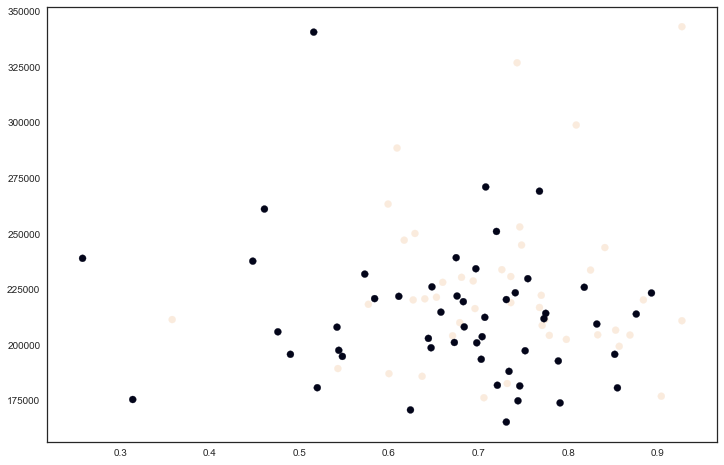

In [25]:
from sklearn import svm
X = pd.DataFrame.drop(spotify,labels=['popular','acousticness','instrumentalness','key','loudness','mode','speechiness','valence'],axis=1).as_matrix()
y = pd.DataFrame.drop(spotify,labels=['acousticness','duration','danceability','energy','instrumentalness','key','liveliness','loudness','mode',
                                     'speechiness','tempo','valence'],axis=1).as_matrix()
y = np.ravel(y)
plt.scatter(X[:,0], X[:,1],c=y)

<b>Linear Kernel Support Vector Machine</b>

We run this with just one iteration since training a support vector machine takes a very long time.

In [26]:
X_train, X_test,y_train, y_test = train_test_split(X,y)
svmm = svm.SVC(kernel="linear")
svmm.fit(X_train,y_train)
predictions = svmm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,predictions))
print("AUC:",metrics.roc_auc_score(y_test, predictions))
print("F1 Score: ",metrics.f1_score(y_test, predictions))
print("Recall Score: ",metrics.recall_score(y_test, predictions))

Accuracy: 0.625
AUC: 0.6071428571428571
F1 Score:  0.5263157894736842
Recall Score:  0.5


<b>Neural Networks</b>

Below, we will model our neural network with 2 layers and see how accurate the model will be.

In [27]:
X = pd.DataFrame.drop(spotify,labels=['popular','acousticness','instrumentalness','key','loudness','mode','speechiness','valence'],axis=1).as_matrix()
y = pd.DataFrame.drop(spotify,labels=['acousticness','duration','danceability','energy','instrumentalness','key','liveliness','loudness','mode',
                                     'speechiness','tempo','valence'],axis=1).as_matrix()
y = np.ravel(y)
data = X
target = y
N, M  = data.shape
X = np.ones((N, M + 1))
X[:, 1:] = data

# Convert into one-hot vectors
num_labels = len(np.unique(target))
Y = np.eye(num_labels)[target] 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [29]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (62, 6)
y_train shape : (62, 2)


Here, we shall model the neural network using softmax cross entropy with logits for computing the score, loss, and probability. Below, we test out different optimizer parameter to see which optimizer yields better result.

In [30]:
n_instances = 100 # number of instances (N)
RANDOM_SEED = 42

def init_weights(n_input, n_hidden, n_output):

    w1 = tf.random_normal(np.shape(np.zeros((n_input, n_hidden))),stddev=0.1,seed=RANDOM_SEED)
    w2 = tf.random_normal(np.shape(np.zeros((n_hidden,n_output))),stddev=0.1,seed=RANDOM_SEED)

    weights = {
        'w1': tf.Variable(w1),
        'w2': tf.Variable(w2)
    }

    return weights

def do_forwardprop(X, W1, W2):

    z1 = tf.matmul(X,W1)     # 1st layer score
    a1 = tf.nn.sigmoid(z1)     # 1st layer activation
    z2 = tf.matmul(z1,W2)      # 2nd layer score
    a2 = tf.nn.sigmoid(z2)     # 2nd layer activation

    return a2, z2

def main(optimizer_fn):

    loss_over_time = np.array([])

    n_input  = 6      # Number of input nodes: # features and 1 bias
    n_hidden = 10      # Number of hidden nodes
    n_output = 2      # Number of outputs 

    weights = init_weights(n_input, n_hidden, n_output)

    X = tf.placeholder("float32", shape=[None, n_input])      # 1st parameter is None because to accommodate multiple instanced
    y = tf.placeholder("float32", shape=[None, n_output])      # 1st parameter is None because to accommodate multiple instanced
    
    a2, z2 = do_forwardprop(X, weights['w1'], weights['w2'])

    predict  = tf.argmax(a2, axis=1)

    loss      = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=z2))
    
    if optimizer_fn == "momentum":
        optimizer = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(loss) 
    elif optimizer_fn == "rmsprop":
        optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss) 
    elif optimizer_fn == "adam":
        optimizer = tf.train.AdamOptimizer().minimize(loss) 
    elif optimizer_fn == "gd":
        optimizer = tf.train.GradientDescentOptimizer().minimize(loss)

    session = tf.Session()
    init = tf.global_variables_initializer()
    session.run(init)

    for epoch in range(100):
        for i in range(len(X_train)):
            _, l = session.run([optimizer, loss], feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

        loss_over_time = np.append(loss_over_time, l)
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == session.run(predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == session.run(predict, feed_dict={X: X_test, y: y_test}))
        
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    weights = session.run(weights)
    session.close()
    
    return loss_over_time, weights

In [31]:
momentum_loss, momentum_weight = main("momentum")

Epoch = 1, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 2, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 3, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 4, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 5, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 6, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 7, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 8, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 9, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 10, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 11, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 12, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 13, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 14, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 15, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 16, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 17, train accuracy = 58.06%, test accurac

In [32]:
rmsprop_loss, rmsprop_weight = main("rmsprop")

Epoch = 1, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 2, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 3, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 4, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 5, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 6, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 7, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 8, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 9, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 10, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 11, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 12, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 13, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 14, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 15, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 16, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 17, train accuracy = 58.06%, test accurac

In [33]:
adam_loss, adam_weight = main("adam")

Epoch = 1, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 2, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 3, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 4, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 5, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 6, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 7, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 8, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 9, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 10, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 11, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 12, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 13, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 14, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 15, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 16, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 17, train accuracy = 58.06%, test accurac

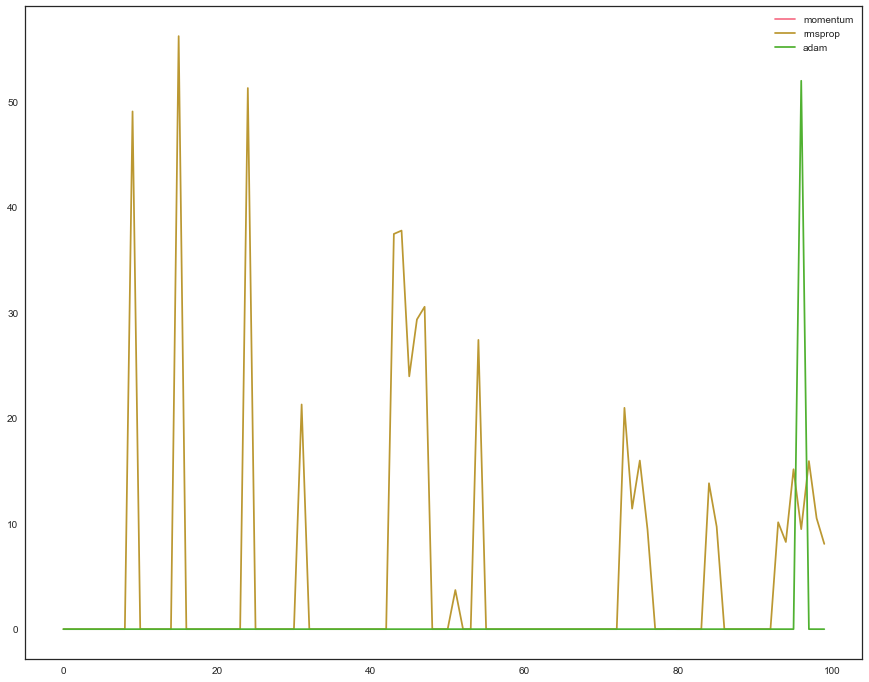

In [34]:
%matplotlib inline
plt.figure(figsize=(15,12))
plt.plot(momentum_loss, label="momentum")
plt.plot(rmsprop_loss, label="rmsprop")
plt.plot(adam_loss,label="adam")
plt.legend(loc="upper right")

Here, we test to see if it would make a difference when sigmoid cross entropy with logits is used instead of softmax.

In [35]:
def main(optimizer_fn):

    loss_over_time = np.array([])

    n_input  = 6      # Number of input nodes: # features and 1 bias
    n_hidden = 10      # Number of hidden nodes
    n_output = 2      # Number of outputs 

    weights = init_weights(n_input, n_hidden, n_output)

    X = tf.placeholder("float32", shape=[None, n_input])      # 1st parameter is None because to accommodate multiple instanced
    y = tf.placeholder("float32", shape=[None, n_output])      # 1st parameter is None because to accommodate multiple instanced
    
    a2, z2 = do_forwardprop(X, weights['w1'], weights['w2'])

    predict  = tf.argmax(a2, axis=1)

    loss      = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z2))
    
    if optimizer_fn == "momentum":
        optimizer = tf.train.MomentumOptimizer(learning_rate=1e-3, momentum=0.9).minimize(loss) 
    elif optimizer_fn == "rmsprop":
        optimizer = tf.train.RMSPropOptimizer(learning_rate=1e-3).minimize(loss) 
    elif optimizer_fn == "adam":
        optimizer = tf.train.AdamOptimizer().minimize(loss) 
    elif optimizer_fn == "gd":
        optimizer = tf.train.GradientDescentOptimizer().minimize(loss)

    session = tf.Session()
    init = tf.global_variables_initializer()
    session.run(init)

    for epoch in range(100):
        for i in range(len(X_train)):
            _, l = session.run([optimizer, loss], feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

        loss_over_time = np.append(loss_over_time, l)
        
        train_accuracy = np.mean(np.argmax(y_train, axis=1) == session.run(predict, feed_dict={X: X_train, y: y_train}))
        test_accuracy  = np.mean(np.argmax(y_test, axis=1) == session.run(predict, feed_dict={X: X_test, y: y_test}))
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
              % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))

    weights = session.run(weights)
    session.close()
    
    return loss_over_time, weights

In [36]:
momentum_loss, momentum_weight = main("momentum")

Epoch = 1, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 2, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 3, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 4, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 5, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 6, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 7, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 8, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 9, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 10, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 11, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 12, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 13, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 14, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 15, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 16, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 17, train accuracy = 58.06%, test accurac

In [37]:
rmsprop_loss, rmsprop_weight = main("rmsprop")

Epoch = 1, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 2, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 3, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 4, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 5, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 6, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 7, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 8, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 9, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 10, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 11, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 12, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 13, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 14, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 15, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 16, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 17, train accuracy = 58.06%, test accurac

In [38]:
adam_loss, adam_weight = main("adam")

Epoch = 1, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 2, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 3, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 4, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 5, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 6, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 7, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 8, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 9, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 10, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 11, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 12, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 13, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 14, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 15, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 16, train accuracy = 58.06%, test accuracy = 46.88%
Epoch = 17, train accuracy = 58.06%, test accurac

In a 2 layer neural network, all three optimizers, namely momentum, rmsprop, and adam, produced the same test accuracy of 46.88 which did not increase over the epoch iterations. As also shown in the graph above, all three optimizers achieved lower loss very quickly. Based on these results, we can clearly see that a 2 layer neural network is not an appropriate model for classifying our dataset.

<b>Summary and Analysis</b>

In this section, we will tabulate all the results from our test run and compare them to find the most accurate model for predicting popular songs based on the given audio features.

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy Score</th> 
    <th>F1 Score</th>
    <th>Recall Score</th>
    <th>AUC Score</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.5414</td> 
    <td>0.4</td> 
    <td>0.5714</td> 
    <td>0.5210</td> 
  </tr>
  <tr>
    <td>Naive Bayes (Gaussian)</td>
    <td>0.5535</td>
    <td>0.375</td> 
    <td>0.3333</td> 
    <td>0.5333</td> 
  </tr>
  <tr>
    <td>Naive Bayes (Multinomial)</td>
    <td>0.6068</td>
    <td>0.5</td> 
    <td>0.5556</td> 
    <td>0.5778</td> 
  </tr>
  <tr>
    <td>SVM (Linear Kernel)</td>
    <td>0.5</td>
    <td>0.1428</td> 
    <td>0.0769</td> 
    <td>0.5384</td> 
  </tr>
  <tr>
    <td>Neural Network</td>
    <td>0.4688</td>
    <td></td> 
    <td></td> 
    <td></td> 
  </tr>
</table>

From the results above, we can see that naive bayes using multinomial classifier is the best model among the models we tried. Even though decision tree had decent scores, the mulinomial implementation of naive bayes still had an overall higher set of scores, most especially its accuracy score topping off every other model with a 0.6 score. The Gaussian Classifier of naive bayes comes in as the third best model among the tested models. Linear SVM is not a good model since it produced similar accuracy and AUC score with decision tree and naive bayes while having a significantly lower F1 and recall score<br>

In neural networks, only accuracy score was obtained which was also not that high and even though lots of hyperparameter tuning was done with neural network modelling, all of them produced the same accuracy score as a result and the accuracy did not increase over the course of the epochs.

From here, we can conclude that when classifying songs of whether they are popular or not in Spotify and we have to rely on the given audio features, multinomial naive bayes will be the best machine learing model used for prediction among the models tested above; however gaussian naive bayes and decision tree may also provide good results as their accuracy also comes near that of multinomial naive bayes.

Song writers or producers may also use this machine learning model classifier to predict whether a song he/she has in mind will become popular or not with a range of 0.55 to 0.6 accuracy.

Most of the accuracy scores here are near 0.5 because the dataset we used consists of only the popular songs, which may induce some bias with the predictions the models produce. For future studies regarding machine learning classification with songs, a better dataset may be used which hopefully will capture not only the popular songs but also the unpopular ones below the charts and the ones in between.